<a href="https://colab.research.google.com/github/neurontist/LangChain-for-LLM-Application-Development/blob/main/L3%20Chains.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chains in LangChain

Outline
* LLMChain
* Sequential Chains
** SimpleSequentialChain
** SequentialChain
* Router Chain

### Chain combines prompt and LLM together to form a building block and we can put a bunch of building blocks together to carry out sequence of operations on text or any data

In [7]:
!pip install python-dotenv
!pip install -qU langchain-google-genai
!pip install  google-ai-generativelanguage==0.6.15

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-generativeai 0.8.5 requires google-ai-generativelanguage==0.6.15, but you have google-ai-generativelanguage 0.6.18 which is incompatible.
  Using cached google_ai_generativelanguage-0.6.15-py3-none-any.whl.metadata (5.7 kB)
Using cached google_ai_generativelanguage-0.6.15-py3-none-any.whl (1.3 MB)
  Attempting uninstall: google-ai-generativelanguage
    Found existing installation: google-ai-generativelanguage 0.6.18
    Uninstalling google-ai-generativelanguage-0.6.18:
      Successfully uninstalled google-ai-generativelanguage-0.6.18
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain-google-genai 2.1.4 requires google-ai-generativelanguage<0.7.0,>=0.6.18, but you have googl

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
import os
from google.colab import userdata
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')

In [10]:
import pandas as pd

In [11]:
df = pd.read_csv("product_reviews.csv")

In [12]:
df.head()

,Product Name,Review
0,Wireless Mouse,Works smoothly and very responsive.
1,Bluetooth Speaker,Great sound quality and battery life.
2,Laptop Stand,Sturdy and ergonomic design.
3,Noise Cancelling Headphones,"Blocks out noise perfectly, very comfortable."
4,Smartwatch,Good features and long-lasting battery.


## LLMChain

In [13]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.prompts import ChatPromptTemplate
from langchain.chains import LLMChain

In [24]:
llm_model = "gemini-1.5-flash"

In [25]:
llm = ChatGoogleGenerativeAI(temperature=0.9, model = llm_model,api_key=GOOGLE_API_KEY)

In [26]:
prompt = ChatPromptTemplate.from_template(
    "What is the best name to describe \
    a company that makes {product}?"
)

prompt

ChatPromptTemplate(input_variables=['product'], input_types={}, partial_variables={}, messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['product'], input_types={}, partial_variables={}, template='What is the best name to describe     a company that makes {product}?'), additional_kwargs={})])

In [27]:
chain = LLMChain(llm=llm, prompt=prompt)  # going to be deprecated soon instead
# chain = prompt | llm   # use this
print(chain)

verbose=False prompt=ChatPromptTemplate(input_variables=['product'], input_types={}, partial_variables={}, messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['product'], input_types={}, partial_variables={}, template='What is the best name to describe     a company that makes {product}?'), additional_kwargs={})]) llm=ChatGoogleGenerativeAI(model='models/gemini-1.5-flash', google_api_key=SecretStr('**********'), temperature=0.9, client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x7ab912b4e590>, default_metadata=(), model_kwargs={}) output_parser=StrOutputParser() llm_kwargs={}


In [28]:
product = "Laptop Stand"
chain.invoke(product)  # chain.run(product) -> this will be deprecated soon

{'product': 'Laptop Stand',
 'text': "The best name will depend on your target audience and brand identity, but here are some ideas categorized by approach:\n\n**Emphasizing Functionality & Practicality:**\n\n* ErgoLift\n* DeskPro\n* LapStand\n* StableBase\n* WorkWell\n* ComfortStand\n* PosturePerfect\n* ElevatedWork\n* LevelUpDesk\n\n**Emphasizing Style & Design:**\n\n* LapLuxe\n* SlimStand\n* MinimalistMount\n* TechChic\n* ModernMount\n* ApexStands\n* CraftedStand\n\n**Emphasizing Innovation & Technology:**\n\n* NovaStand\n* TechLift\n* SmartStand\n* iStand (if Apple-focused)\n* ErgoTech\n* KineticStand\n\n\n**Creative & Catchy Names:**\n\n* LapTopia\n* StandOut\n* The Perch\n* Uplift\n* LevelGround\n\n\n**Before choosing, consider:**\n\n* **Availability:** Check for trademark conflicts and domain name availability.\n* **Memorability:** Is it easy to remember and pronounce?\n* **Target audience:** Does the name appeal to your ideal customer?\n* **Brand personality:** Does the name re

## Simple Sequential Chains

Sequential chain is another type of chains. The idea is to combine multiple chains where the output of the one chain is the input of the next chain.

There is two type of Sequential chains:
1. SimpleSequentialChain: Single input/output
2. SequentialChain: Multiple inputs/outputs

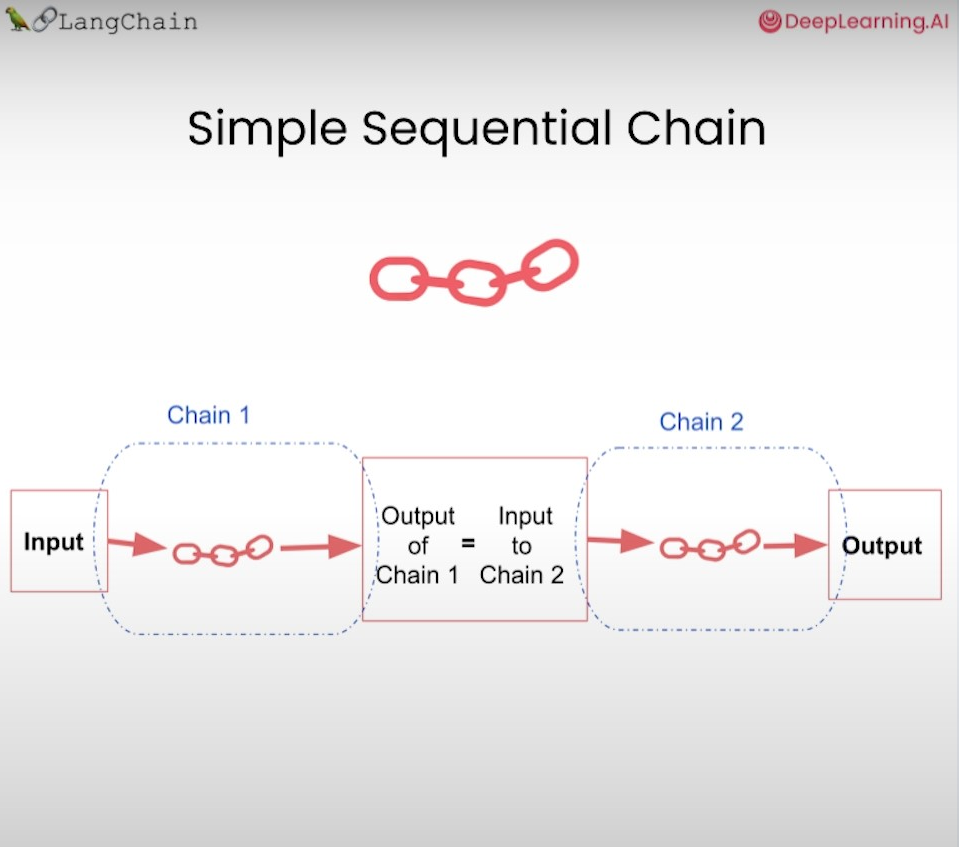

In [29]:
from langchain.chains import SimpleSequentialChain

In [30]:
# Prompt Template 1
first_prompt = ChatPromptTemplate.from_template(
    "What is the best name to describe \
    a company that makes {product}?"
)

# Chain 1
chain_one = LLMChain(llm=llm, prompt=first_prompt)

In [31]:
# prompt template 2
second_prompt = ChatPromptTemplate.from_template(
    "Write a 20 words description for the following \
    company:{company_name}"
)
# chain 2
chain_two = LLMChain(llm=llm, prompt=second_prompt)

In [32]:
overall_simple_chain = SimpleSequentialChain(chains=[chain_one, chain_two],
                                             verbose=True
                                            )

In [33]:
overall_simple_chain.run(product)

<ipython-input-33-e9f713fe1638>:1: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  overall_simple_chain.run(product)




> Entering new SimpleSequentialChain chain...
The best name will depend on your target audience and brand identity. Here are some ideas, categorized by approach:

**Modern & Minimalist:**

* StandPoint
* LapLift
* ErgoRise
* DeskDock
* TiltTech
* LevelUp
* StableBase
* WorkWell

**Descriptive & Functional:**

* Laptop Stand Solutions
* The Laptop Stand Company
* Premium Laptop Stands
* Ergonomic Laptop Stands
* Adjustable Laptop Stands

**Creative & Evocative:**

* SkyRise (evokes elevation and productivity)
* Zenith Stands (suggests peak performance)
* ComfortCraft (highlights comfort and craftsmanship)
* Digital Oasis (creates a feeling of calm and organization)
* Elevate Workspace (emphasizes improvement and work environment)


**Things to consider when choosing:**

* **Availability:** Check for trademark conflicts and domain name availability.
* **Memorability:**  Is it easy to remember and pronounce?
* **Target Audience:** Does the name resonate with your ideal customer?
* **Bra

'Ergonomic laptop stands enhancing workspace comfort and productivity.  Premium quality, innovative design.'

## Sequential Chain

In [34]:
from langchain.chains import SequentialChain

In [43]:
llm = ChatGoogleGenerativeAI(temperature=0.9,model="gemini-1.5-flash",api_key=GOOGLE_API_KEY)

In [44]:
first_prompt = ChatPromptTemplate.from_template(
     "Translate the following review to english:"
    "\n\n{Review}"
)

chain_one = LLMChain(llm=llm, prompt=first_prompt, output_key="English_Review")

In [45]:
second_prompt = ChatPromptTemplate.from_template(
    "Can you summarize the following review in 1 sentence:"
    "\n\n{English_Review}"
)
# chain 2: input= English_Review and output= summary
chain_two = LLMChain(llm=llm, prompt=second_prompt,
                     output_key="summary"
                    )

In [46]:
third_prompt = ChatPromptTemplate.from_template(
    "What language is the following review:\n\n{Review}"
)
# chain 3: input= Review and output= language
chain_three = LLMChain(llm=llm, prompt=third_prompt,
                       output_key="language"
                      )

In [47]:
fourth_prompt = ChatPromptTemplate.from_template(
    "Write a follow up response to the following "
    "summary in the specified language:"
    "\n\nSummary: {summary}\n\nLanguage: {language}"
)
# chain 4: input= summary, language and output= followup_message
chain_four = LLMChain(llm=llm, prompt=fourth_prompt,
                      output_key="followup_message"
                     )


In [48]:
# overall_chain: input= Review
# and output= English_Review,summary, followup_message
overall_chain = SequentialChain(
    chains=[chain_one, chain_two, chain_three, chain_four],
    input_variables=["Review"],
    output_variables=["English_Review", "summary","followup_message"],
    verbose=True
)

In [49]:
review = df.Review[5]
overall_chain(review)



> Entering new SequentialChain chain...

> Finished chain.


{'Review': 'Fast charging and compact.',
 'English_Review': 'The translation is already in English.',
 'summary': 'The review states that the text is already in English, so no translation is needed.',
 'followup_message': 'Okay, understood.  Please proceed with the next step.'}

## Router Chain

In [50]:
physics_template = """You are a very smart physics professor. \
You are great at answering questions about physics in a concise\
and easy to understand manner. \
When you don't know the answer to a question you admit\
that you don't know.

Here is a question:
{input}"""


math_template = """You are a very good mathematician. \
You are great at answering math questions. \
You are so good because you are able to break down \
hard problems into their component parts,
answer the component parts, and then put them together\
to answer the broader question.

Here is a question:
{input}"""

history_template = """You are a very good historian. \
You have an excellent knowledge of and understanding of people,\
events and contexts from a range of historical periods. \
You have the ability to think, reflect, debate, discuss and \
evaluate the past. You have a respect for historical evidence\
and the ability to make use of it to support your explanations \
and judgements.

Here is a question:
{input}"""


computerscience_template = """ You are a successful computer scientist.\
You have a passion for creativity, collaboration,\
forward-thinking, confidence, strong problem-solving capabilities,\
understanding of theories and algorithms, and excellent communication \
skills. You are great at answering coding questions. \
You are so good because you know how to solve a problem by \
describing the solution in imperative steps \
that a machine can easily interpret and you know how to \
choose a solution that has a good balance between \
time complexity and space complexity.

Here is a question:
{input}"""

In [51]:
prompt_infos = [
    {
        "name": "physics",
        "description": "Good for answering questions about physics",
        "prompt_template": physics_template
    },
    {
        "name": "math",
        "description": "Good for answering math questions",
        "prompt_template": math_template
    },
    {
        "name": "History",
        "description": "Good for answering history questions",
        "prompt_template": history_template
    },
    {
        "name": "computer science",
        "description": "Good for answering computer science questions",
        "prompt_template": computerscience_template
    }
]

In [52]:
from langchain.chains.router import MultiPromptChain
from langchain.chains.router.llm_router import LLMRouterChain, RouterOutputParser
from langchain.prompts import PromptTemplate

In [62]:
llm = ChatGoogleGenerativeAI(temperature=0, model=llm_model,api_key=GOOGLE_API_KEY)

In [63]:
destination_chains = {}
for p_info in prompt_infos:
  name = p_info["name"]
  prompt_template = p_info["prompt_template"]
  prompt = ChatPromptTemplate.from_template(template=prompt_template)
  chain = LLMChain(llm=llm, prompt=prompt)
  destination_chains[name] = chain

destinations = [f"{p['name']}:{p['description']}" for p in prompt_infos]
destinations_str = "\n".join(destinations)

In [64]:
default_prompt = ChatPromptTemplate.from_template("{input}")
default_chain = LLMChain(llm=llm , prompt=default_prompt)

In [65]:
MULTI_PROMPT_ROUTER_TEMPLATE = """Given a raw text input to a \
language model select the model prompt best suited for the input. \
You will be given the names of the available prompts and a \
description of what the prompt is best suited for. \
You may also revise the original input if you think that revising\
it will ultimately lead to a better response from the language model.

<< FORMATTING >>
Return a markdown code snippet with a JSON object formatted to look like:
```json
{{{{
    "destination": string \ "DEFAULT" or name of the prompt to use in {destinations}
    "next_inputs": string \ a potentially modified version of the original input
}}}}
```

REMEMBER: The value of “destination” MUST match one of \
the candidate prompts listed below.\
If “destination” does not fit any of the specified prompts, set it to “DEFAULT.”
REMEMBER: "next_inputs" can just be the original input \
if you don't think any modifications are needed.

<< CANDIDATE PROMPTS >>
{destinations}

<< INPUT >>
{{input}}

<< OUTPUT (remember to include the ```json)>>"""

In [66]:
router_template = MULTI_PROMPT_ROUTER_TEMPLATE.format(
    destinations = destinations_str
)
router_prompt = PromptTemplate(
    template=router_template,
    input_variables=["input"],
    output_parser=RouterOutputParser(),
)

router_chain = LLMRouterChain.from_llm(llm,router_prompt)

In [67]:
chain = MultiPromptChain(router_chain=router_chain,
                         destination_chains=destination_chains,
                         default_chain=default_chain, verbose=True
                         )

In [68]:
chain.run("What is black body radiation?")



> Entering new MultiPromptChain chain...
physics: {'input': 'What is black body radiation?'}
> Finished chain.


'Black body radiation is the electromagnetic radiation emitted by an idealized object called a "black body."  A black body absorbs all electromagnetic radiation incident upon it, regardless of frequency or angle of incidence.  Because it absorbs all radiation, it also emits radiation at all frequencies, with the intensity of that emission depending only on the body\'s temperature.  The spectrum of this emitted radiation is described by Planck\'s law.'

In [69]:
chain.run("Give one number which is perfect odd number")



> Entering new MultiPromptChain chain...
math: {'input': 'Give one number which is a perfect odd number.'}
> Finished chain.


'There is no known odd perfect number.  The existence of odd perfect numbers is a long-standing unsolved problem in number theory.  Therefore, I cannot give you a number that fits that description.'

In [70]:
chain.run("Why does every cell in our body contain DNA?")



> Entering new MultiPromptChain chain...
None: {'input': 'Why does every cell in our body contain DNA?'}
> Finished chain.


"Every cell in our body (except for red blood cells, which lose their nucleus during maturation) contains DNA because it holds the **blueprint for building and maintaining the organism**.  DNA contains the genetic instructions needed for:\n\n* **Protein synthesis:**  DNA codes for the production of proteins, which are the workhorses of the cell.  Proteins carry out virtually all cellular functions, from catalyzing reactions (enzymes) to providing structural support.\n\n* **Cell function and regulation:**  Genes within the DNA regulate various cellular processes, including cell growth, division, and death.  This ensures proper cell function and prevents uncontrolled growth (cancer).\n\n* **Inheritance:** DNA is passed from parent cells to daughter cells during cell division (mitosis and meiosis). This ensures that every cell in the body carries the same genetic information, allowing for coordinated function and development.  It also allows for the transmission of genetic information fro